### Student Performance Indicator
Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

There are no missing values and no duplicate values in this data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

#### Exploring Data

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
print("Categories in 'Gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'Parental level of Education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'Test Preparation Course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race_ethinicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of Education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'Test Preparation Course' variable:   ['none' 'completed']


In [15]:
# Separating Numerical and Cateorical Columns

numerical = [col for col in df.columns if df[col].dtype != 'O']
categorical = [col for col in df.columns if df[col].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical), numerical))
print('\nWe have {} categorical features : {}'.format(len(categorical), categorical))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding Columns for Total Score and Average

In [16]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
maths_full = df[df['math_score'] == 100]['Average'].count()
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()


print(f"There are {maths_full} students who scored full marks in Maths.")
print(f"There are {reading_full} students who scored full marks in Reading.")
print(f"There are {writing_full} students who scored full marks in Writing.")


There are 7 students who scored full marks in Maths.
There are 17 students who scored full marks in Reading.
There are 14 students who scored full marks in Writing.


In [23]:
maths_less_20 = df[df['math_score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20  = df[df['writing_score'] <= 20]['Average'].count()


print(f"There are {maths_less_20} students who scored less than 20 marks in Maths.")
print(f"There are {reading_less_20} students who scored less than 20 marks in Reading.")
print(f"There are {writing_less_20} students who scored less than 20 marks in Writing.")


There are 4 students who scored less than 20 marks in Maths.
There are 1 students who scored less than 20 marks in Reading.
There are 3 students who scored less than 20 marks in Writing.


#### Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

### Data Visualization

<Axes: xlabel='Average', ylabel='Count'>

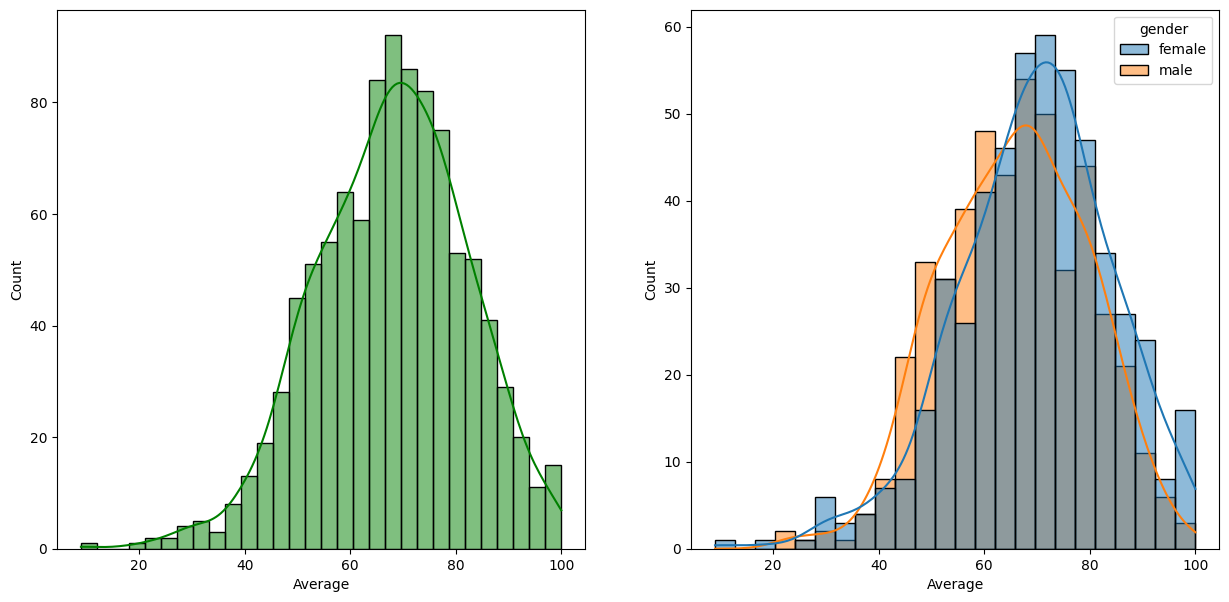

In [24]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')

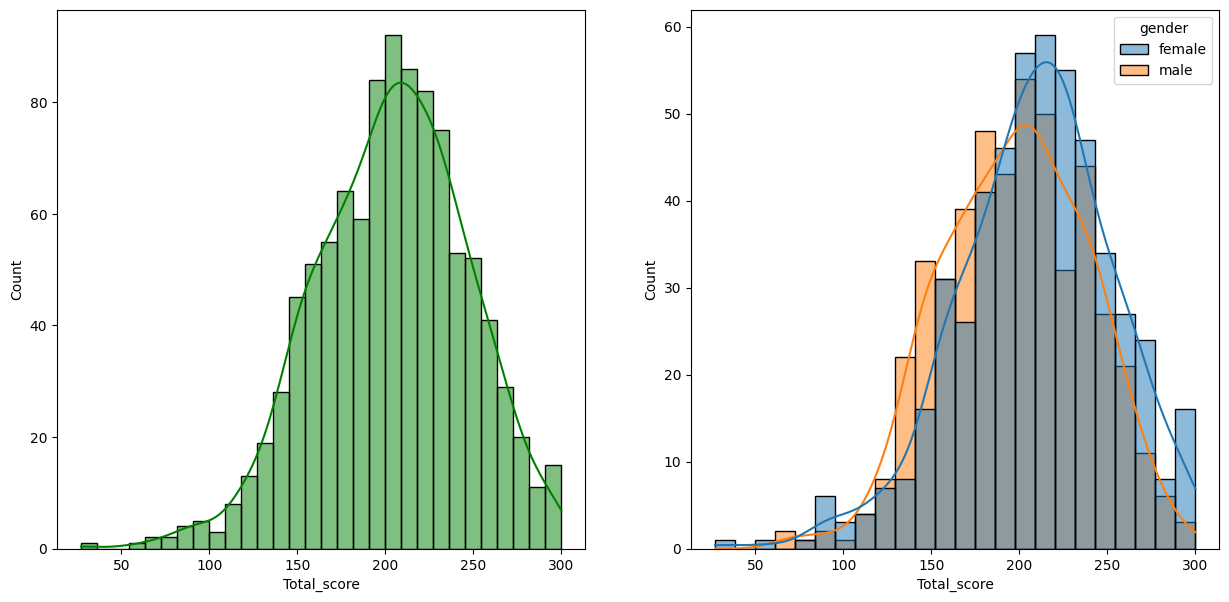

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

#### Insights
* Female students tend to perform better than male students

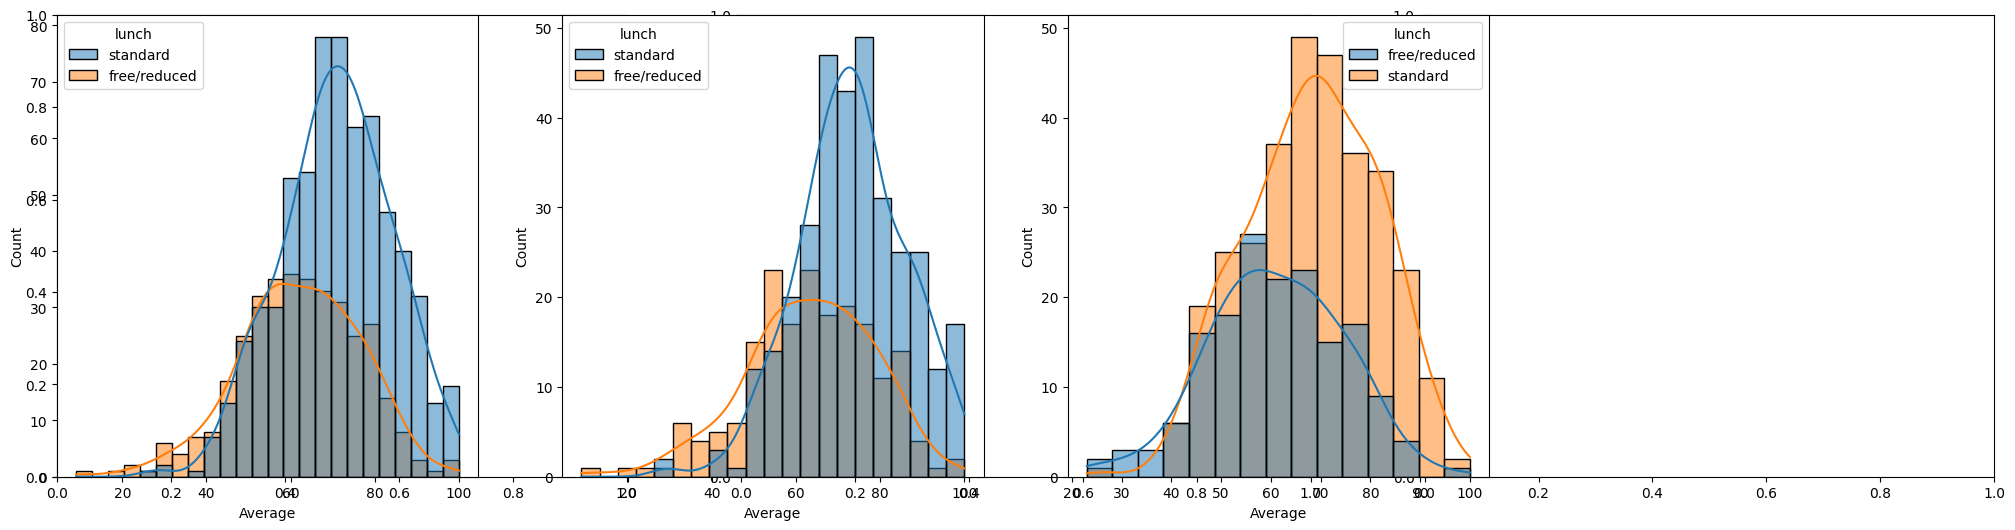

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

#### Insights 
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

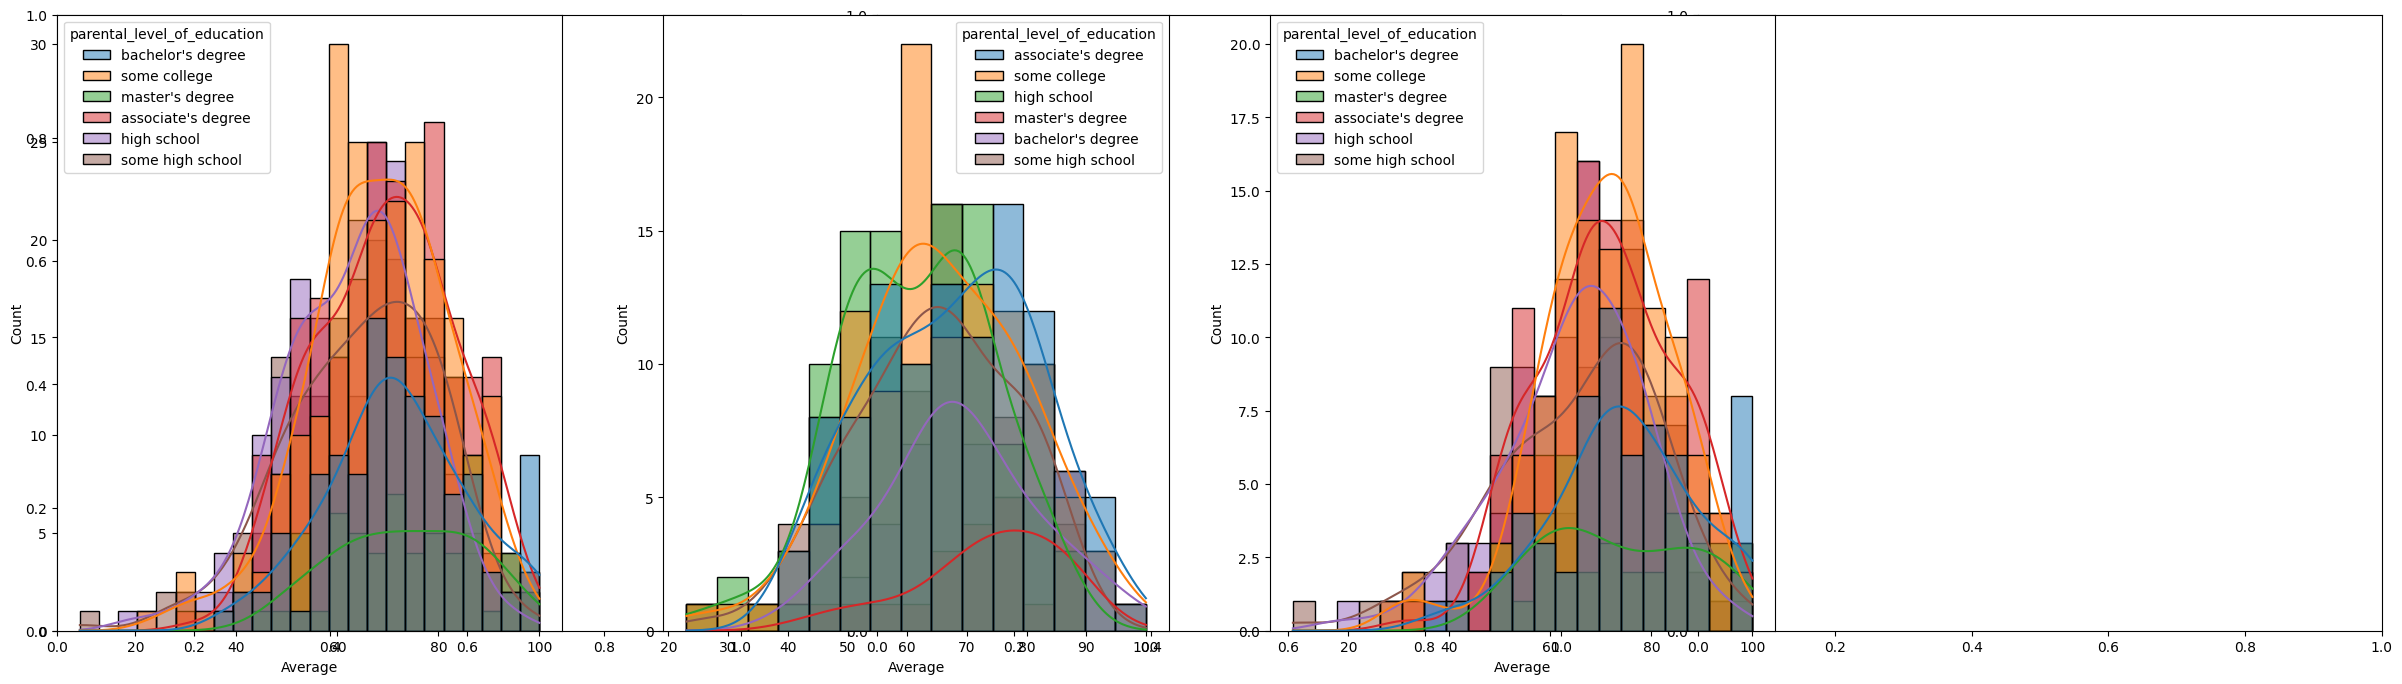

In [32]:
plt.subplots(1,3,figsize=(30,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.


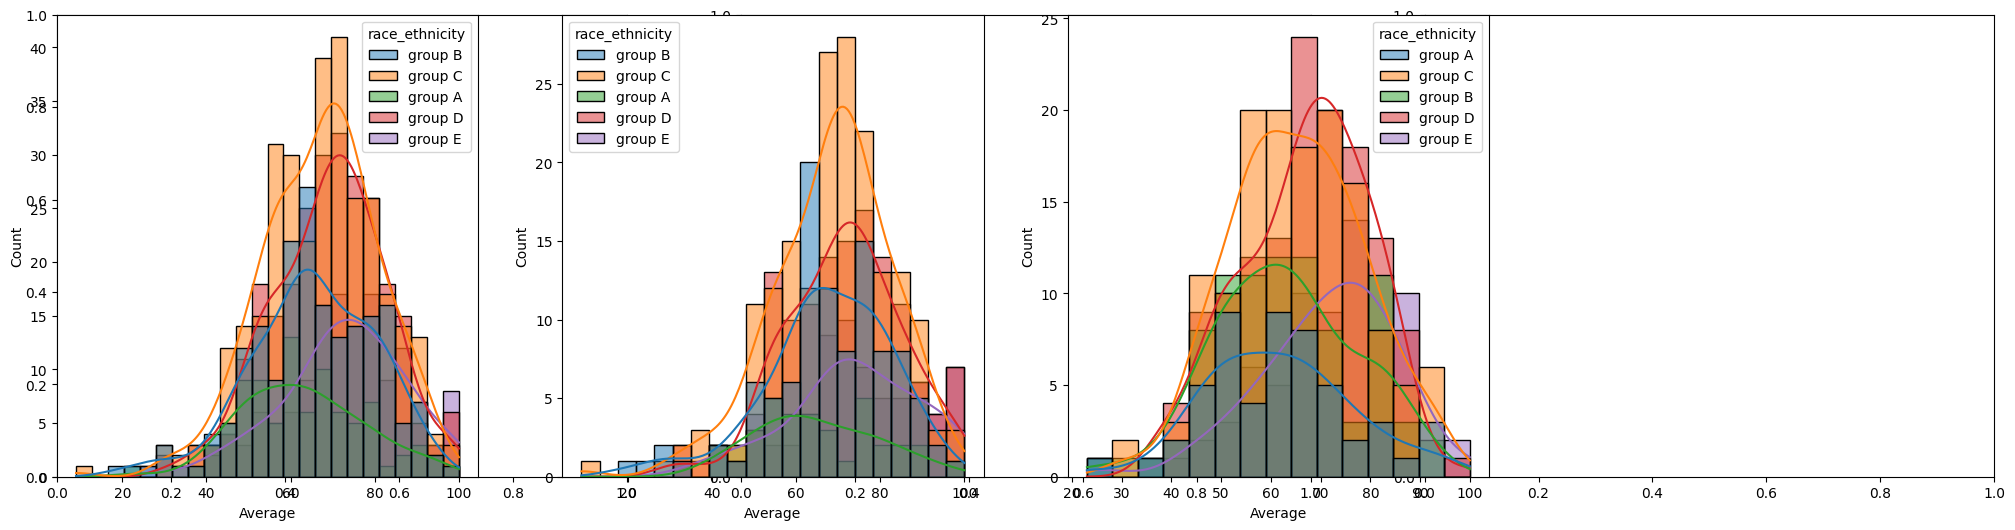

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show() 

#### Insights
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.
* Students of group E, group D and group C tends to perform well in exam irrespective of whether they are male or female.

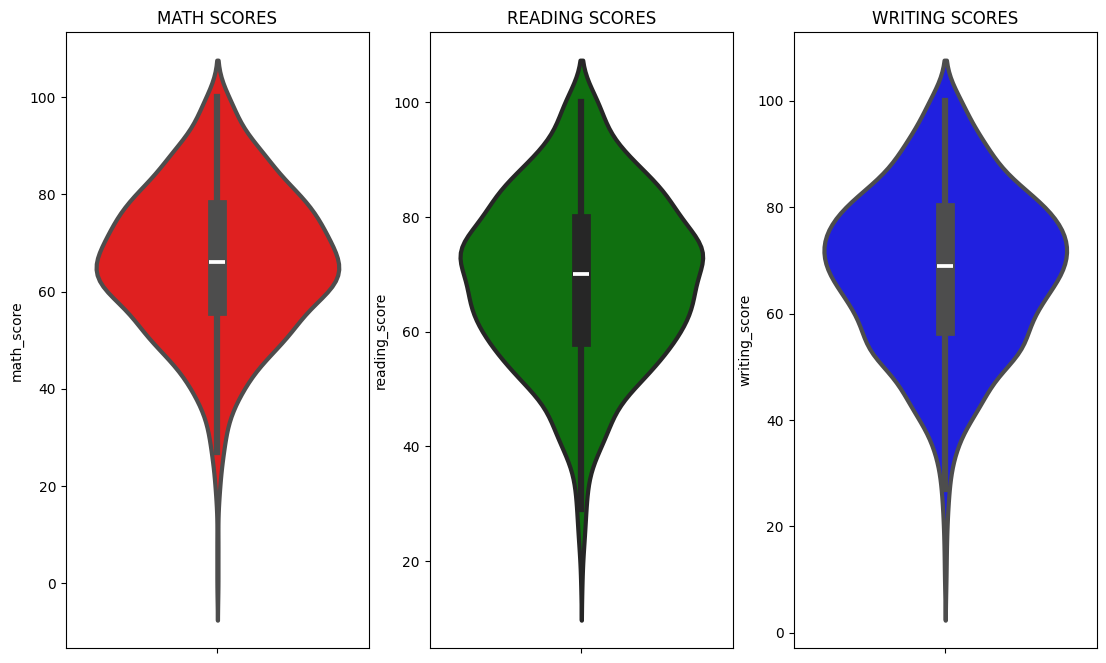

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

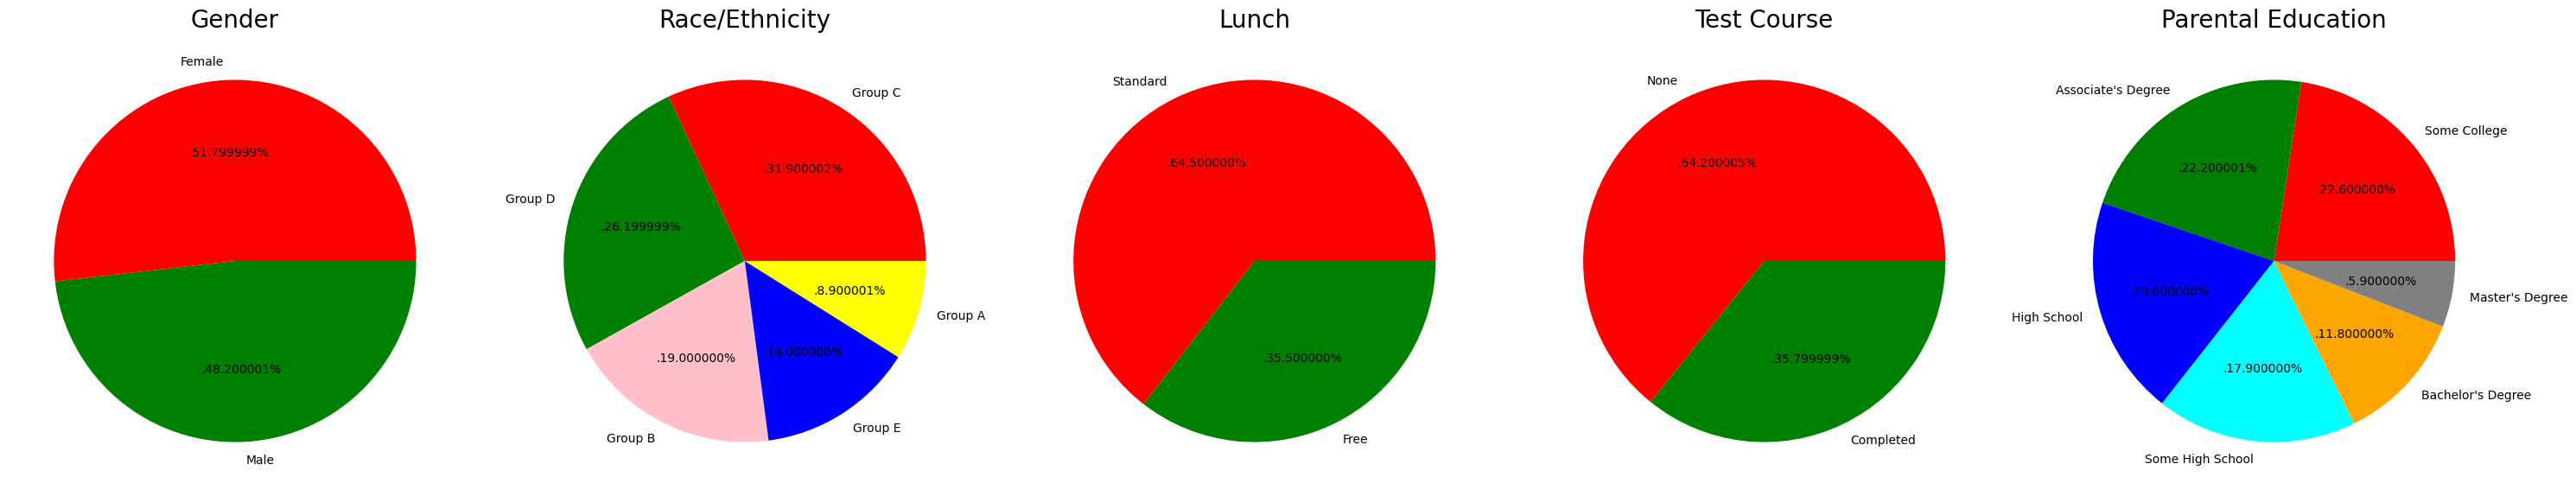

In [43]:
plt.subplots(1,5,figsize=(30,12))

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red','green','pink','blue','yellow','brown']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is  greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization

#### Univariate Analysis of Gender Column

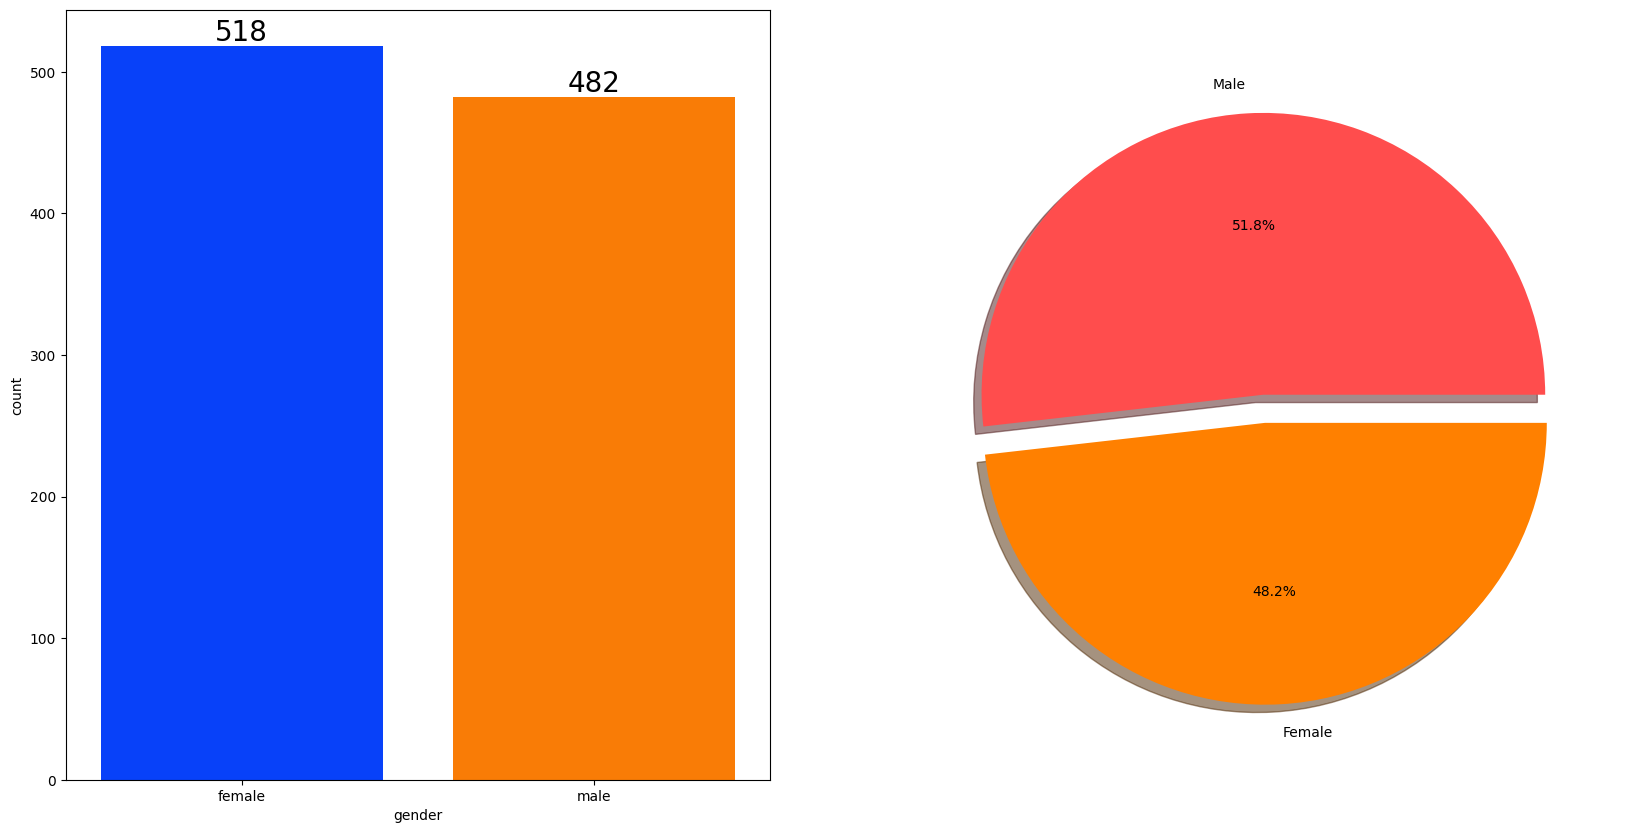

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### Bivariate Analysis of Gender Column

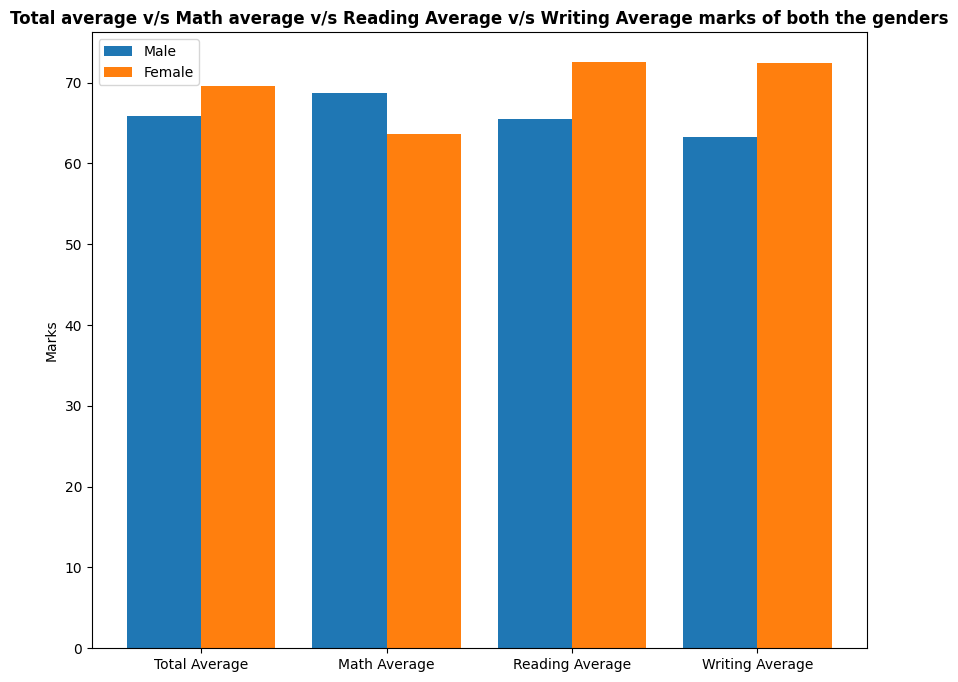

In [65]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Reading Average','Writing Average']


female_scores = [df.groupby('gender')['Average'].mean()[0], df.groupby('gender')['math_score'].mean()[0],df.groupby('gender')['reading_score'].mean()[0],df.groupby('gender')['writing_score'].mean()[0]]
male_scores = [df.groupby('gender')['Average'].mean()[1], df.groupby('gender')['math_score'].mean()[1],df.groupby('gender')['reading_score'].mean()[1],df.groupby('gender')['writing_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average v/s Reading Average v/s Writing Average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

#### Univariate Analysis of Race/Ethnicity Column

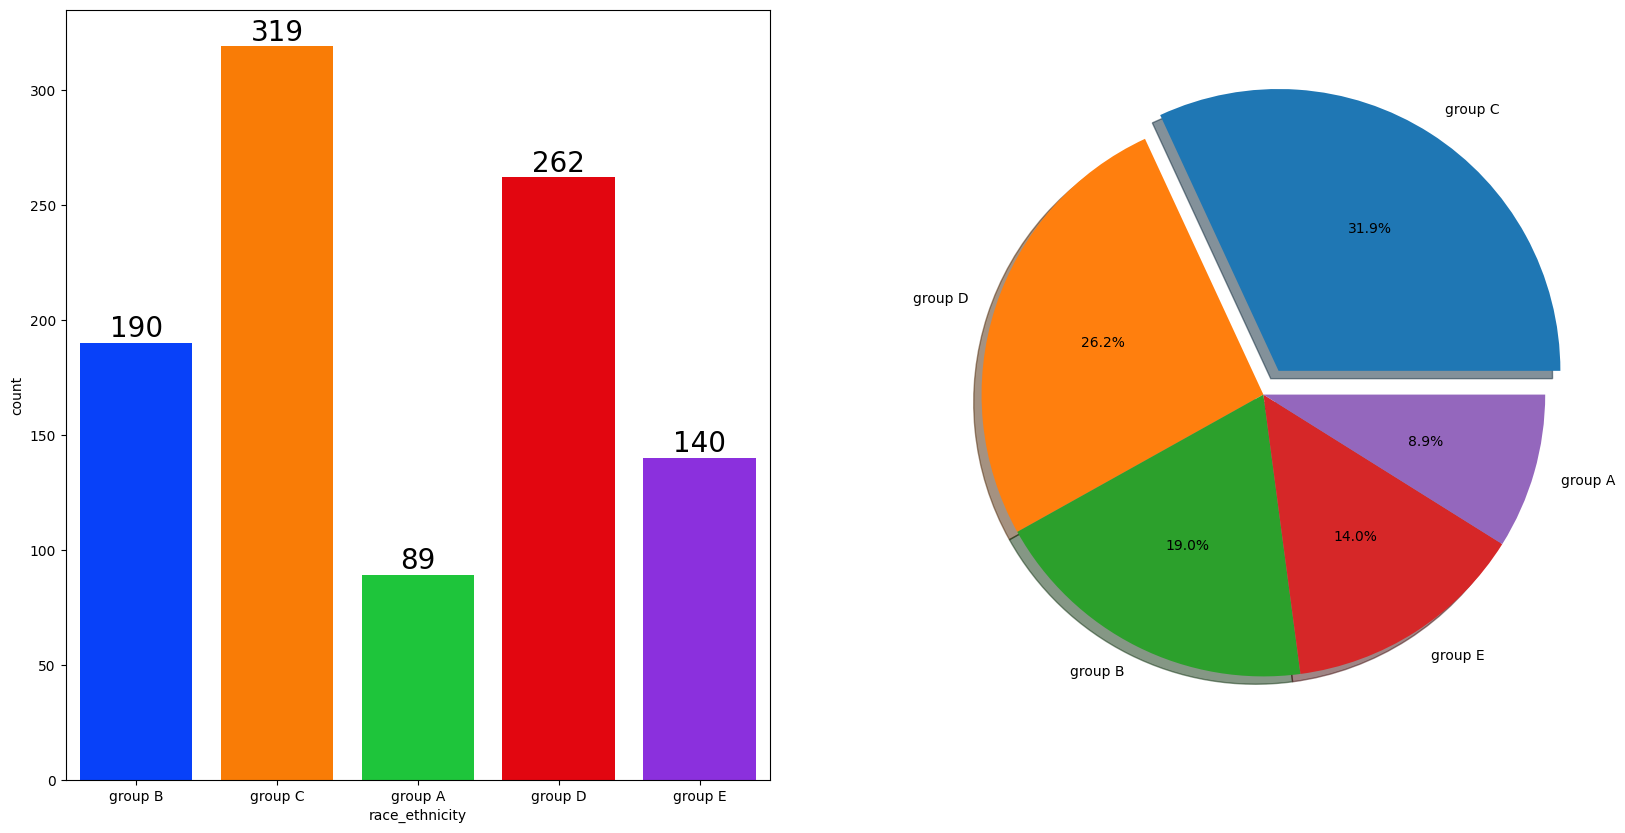

In [71]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### Bivariate Analysis of Race/Ethnicity Column

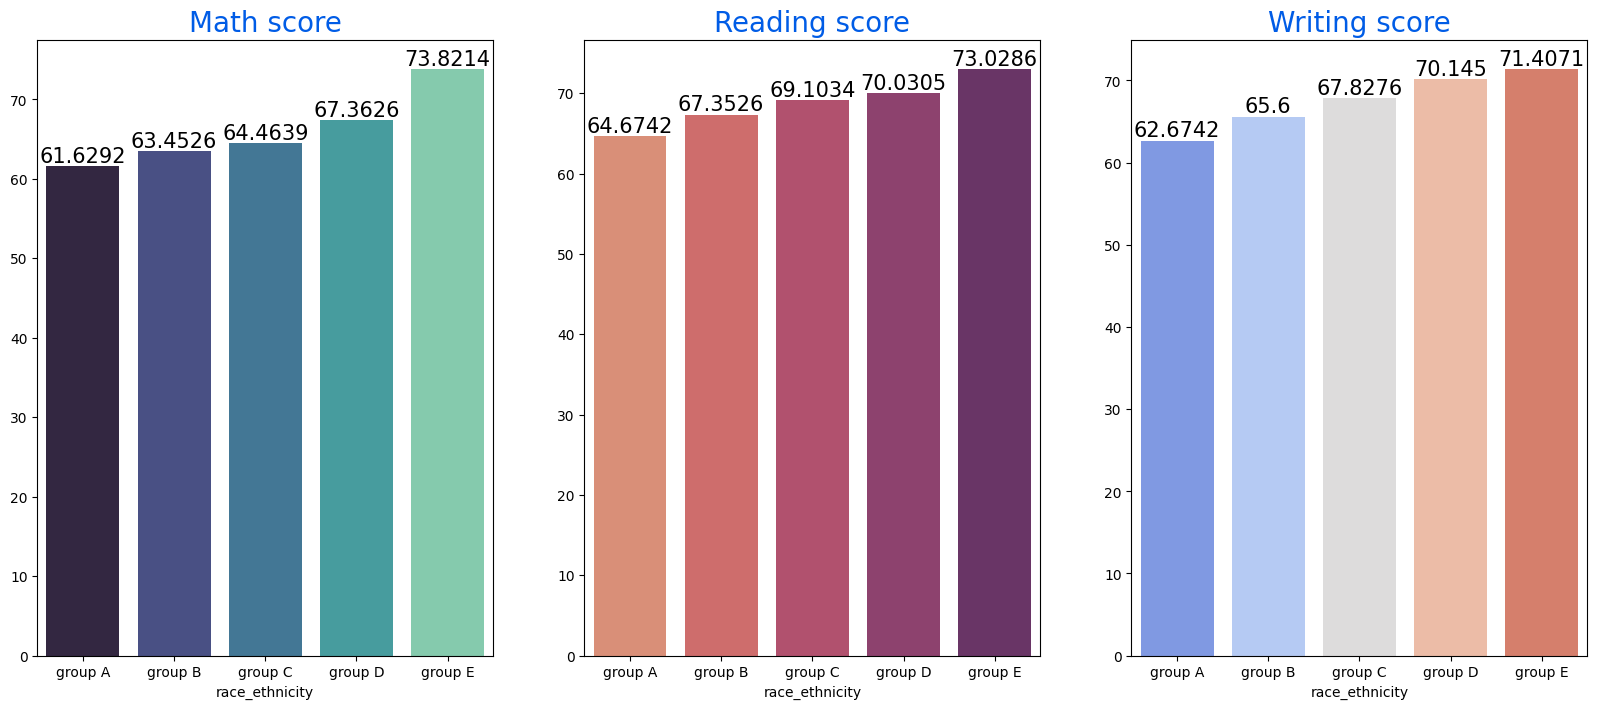

In [72]:
Group_data2 = df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

#### Univariate Analysis of Parent Level of Education Column

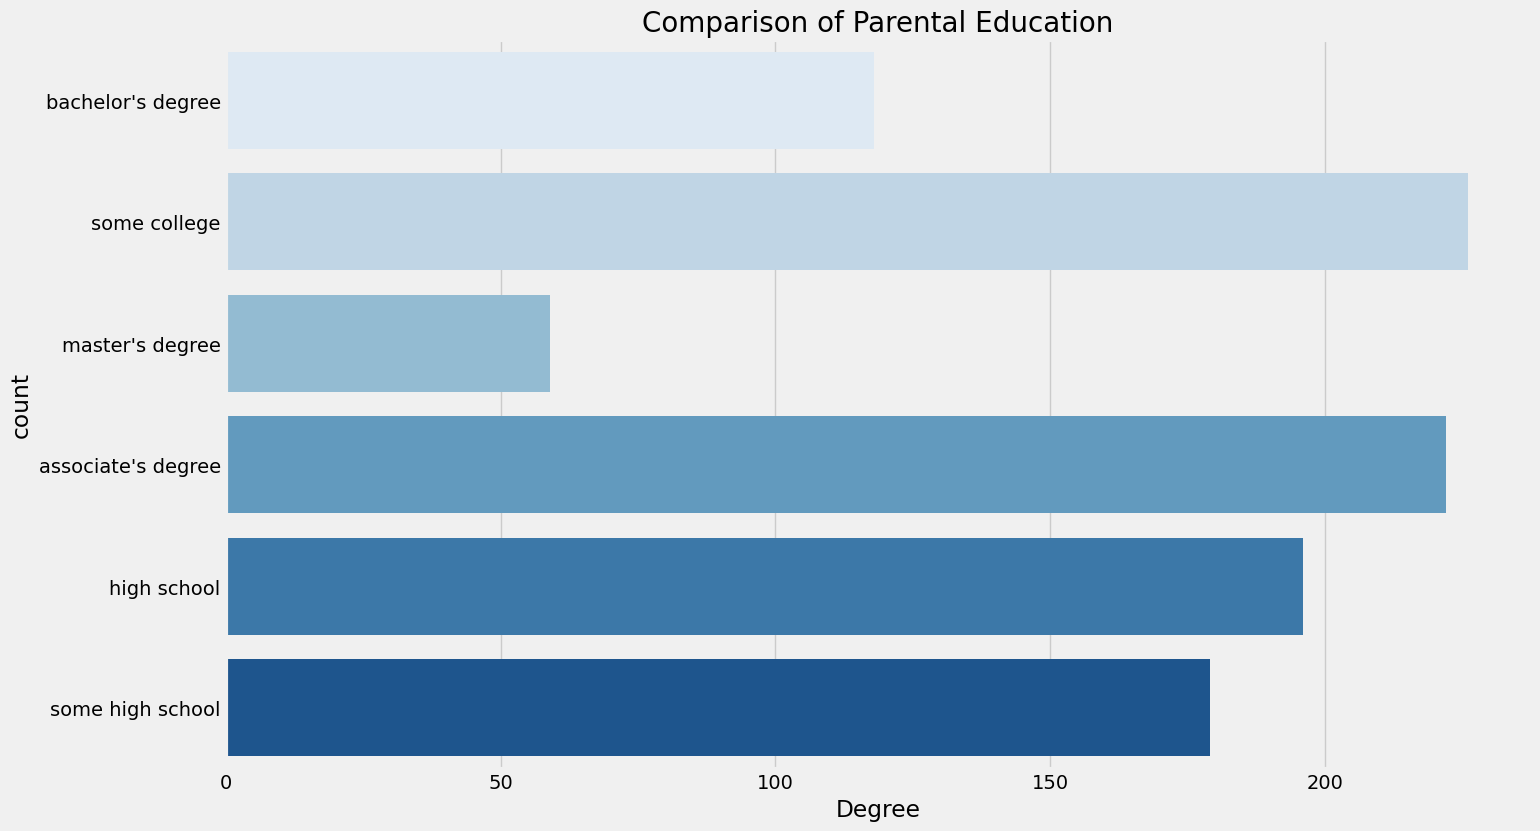

In [76]:
plt.figure(figsize=(15,9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
* Largest number of parents are from some college.

#### Bivariate Analysis of Parent Level of Education Column

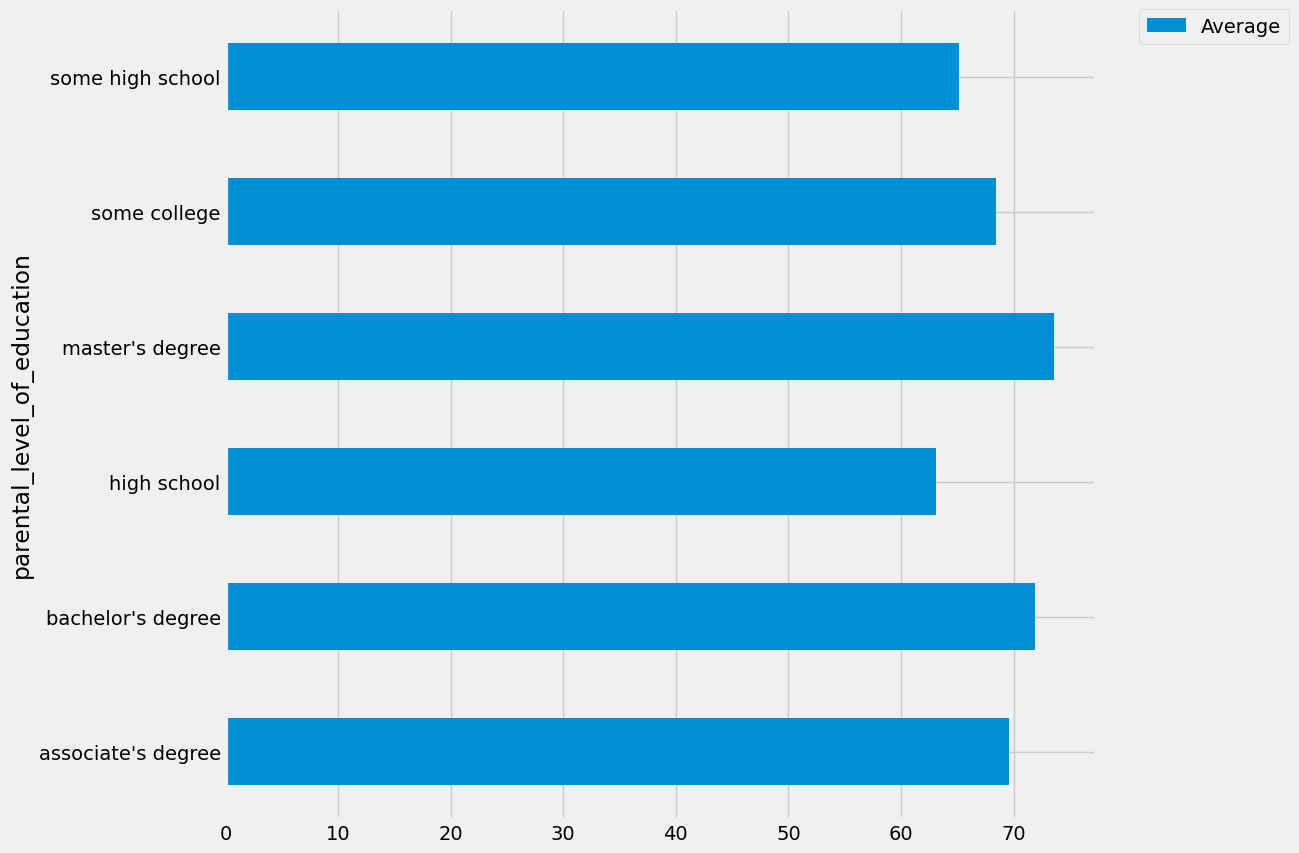

In [79]:
df.groupby('parental_level_of_education')['Average'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

##### Univariate Analysis of Lunch Column

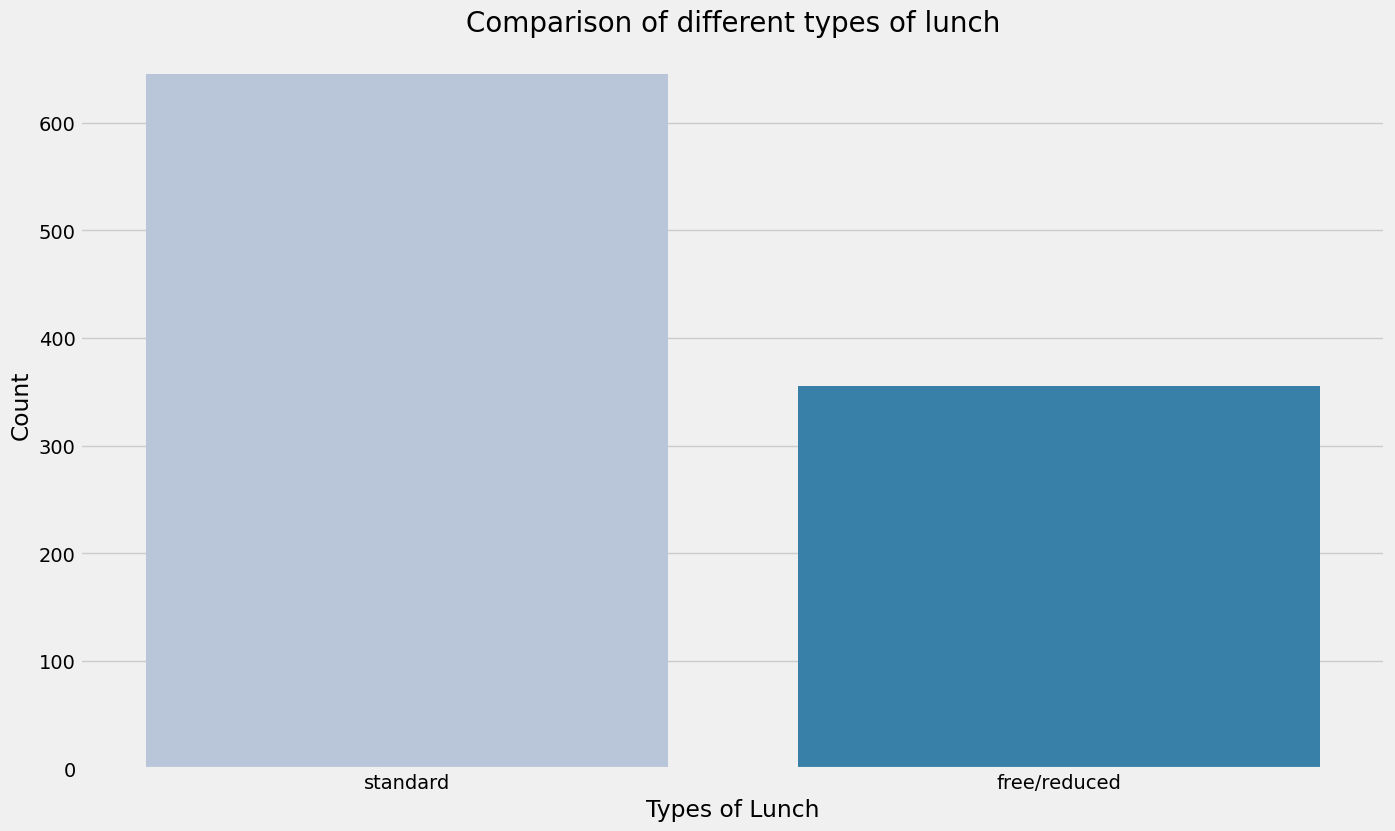

In [81]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='lunch',palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights
* Students being served Standard lunch was more than free lunch

#### Bivariate Analysis of Lunch Column

In [103]:
df.groupby('lunch')['Average'].mean()

lunch
free/reduced    62.199061
standard        70.837209
Name: Average, dtype: float64

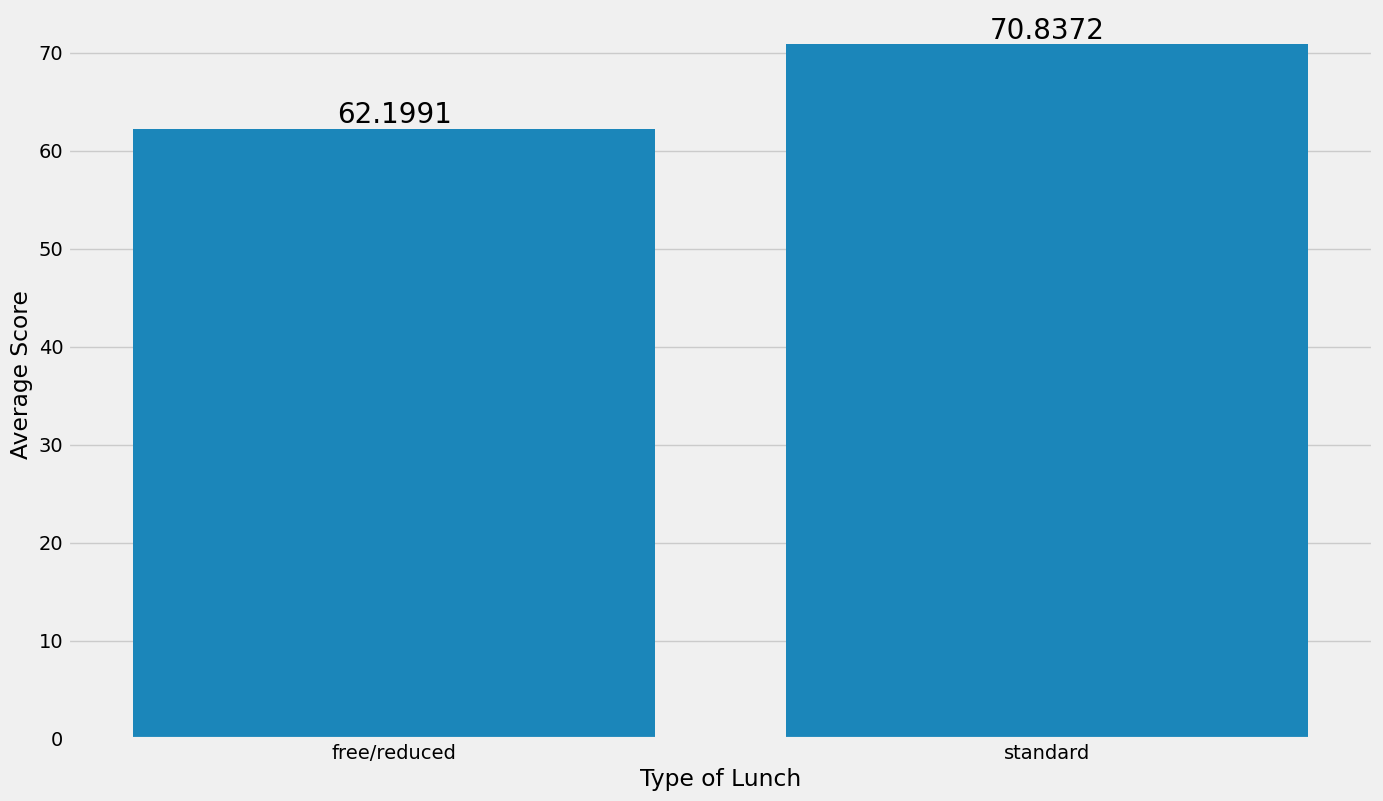

In [102]:
fig, ax = plt.subplots(1,1,figsize=(15,9))
sns.barplot(x=df.groupby('lunch')['Average'].mean().index,y=df.groupby('lunch')['Average'].mean().values,ax=ax)
plt.xlabel('Type of Lunch')
plt.ylabel('Average Score')

for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.show()

#### Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### Univariate Analysis on Test Preparation Course Column

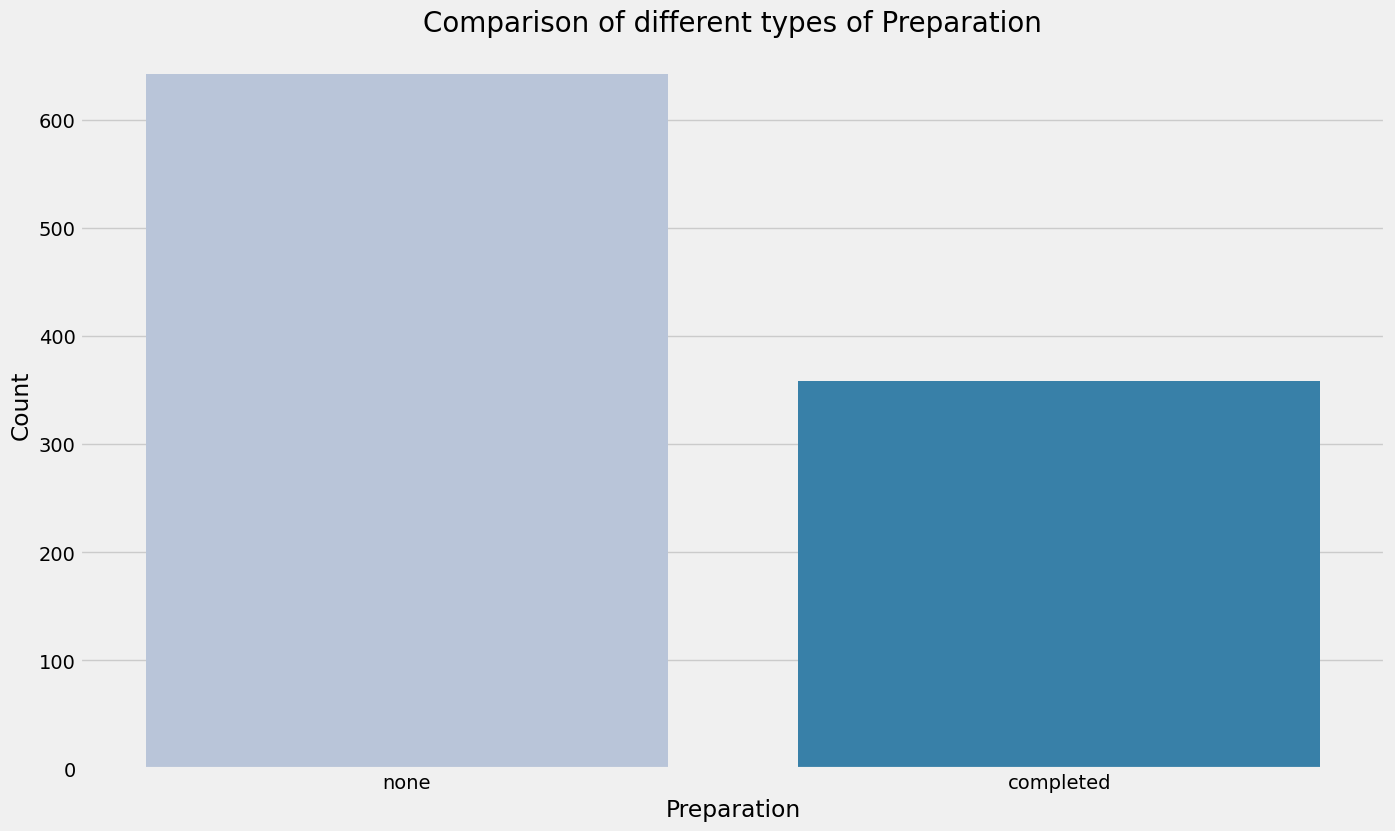

In [105]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='test_preparation_course',palette='PuBu')
plt.title('Comparison of different types of Preparation',fontweight=30,fontsize=20)
plt.xlabel('Preparation')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis on Test Preparation Course Column

In [107]:
df.groupby('test_preparation_course')['Average'].mean()

test_preparation_course
completed    72.669460
none         65.038941
Name: Average, dtype: float64

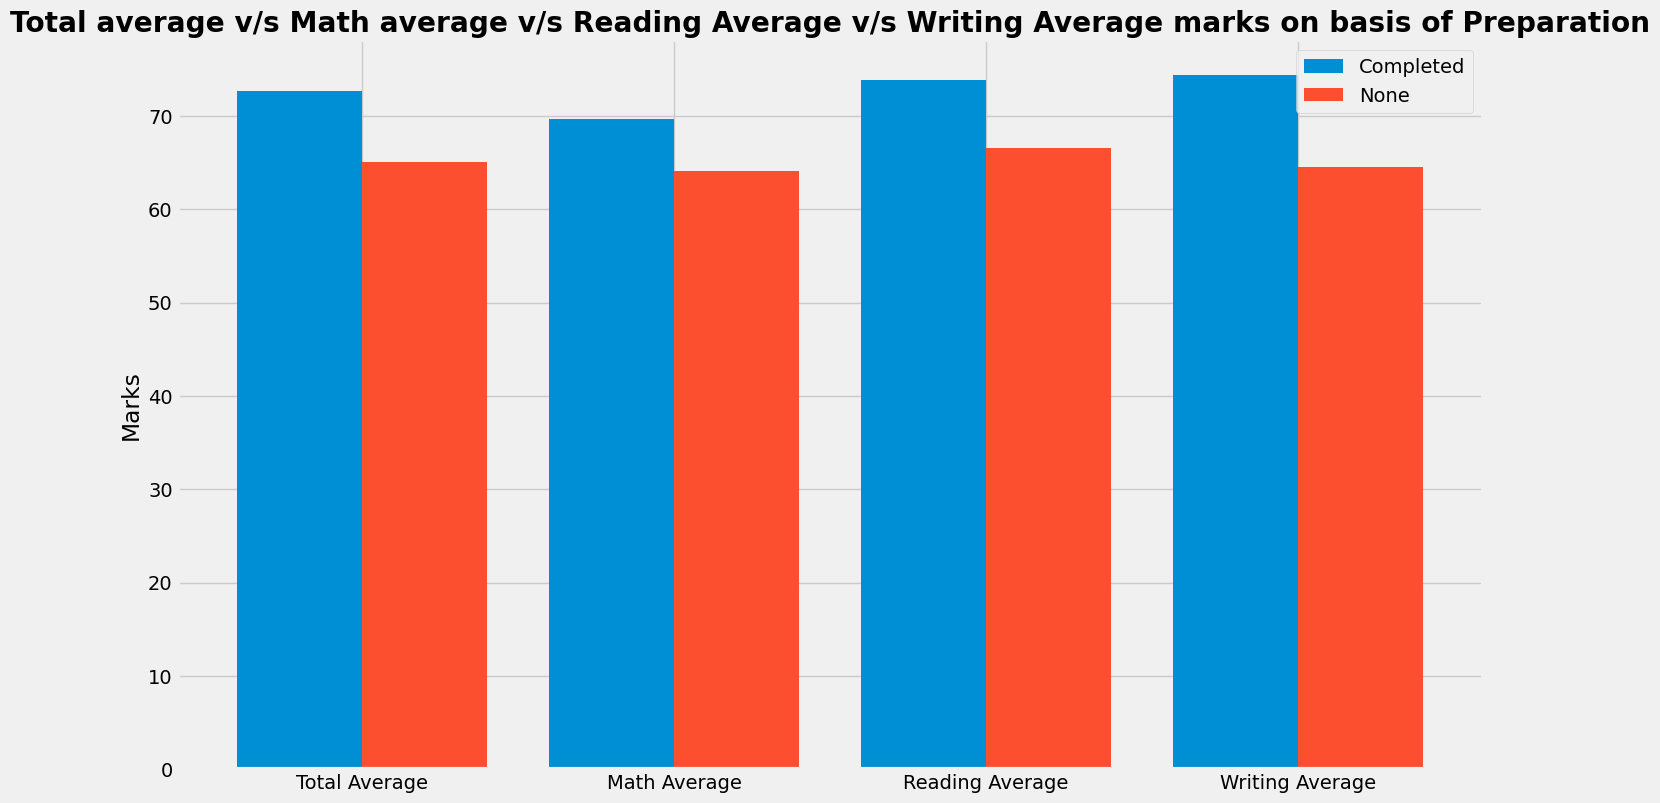

In [108]:
plt.figure(figsize=(15,9))

group_data_test = df.groupby('test_preparation_course')

X = ['Total Average','Math Average','Reading Average','Writing Average']

completed_values = [group_data_test['Average'].mean()[0],group_data_test['math_score'].mean()[0],group_data_test['reading_score'].mean()[0],group_data_test['writing_score'].mean()[0]]
none_values = [group_data_test['Average'].mean()[1],group_data_test['math_score'].mean()[1],group_data_test['reading_score'].mean()[1],group_data_test['writing_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, completed_values, 0.4, label = 'Completed')
plt.bar(X_axis + 0.2, none_values, 0.4, label = 'None')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average v/s Reading Average v/s Writing Average marks on basis of Preparation", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Checking Outliers

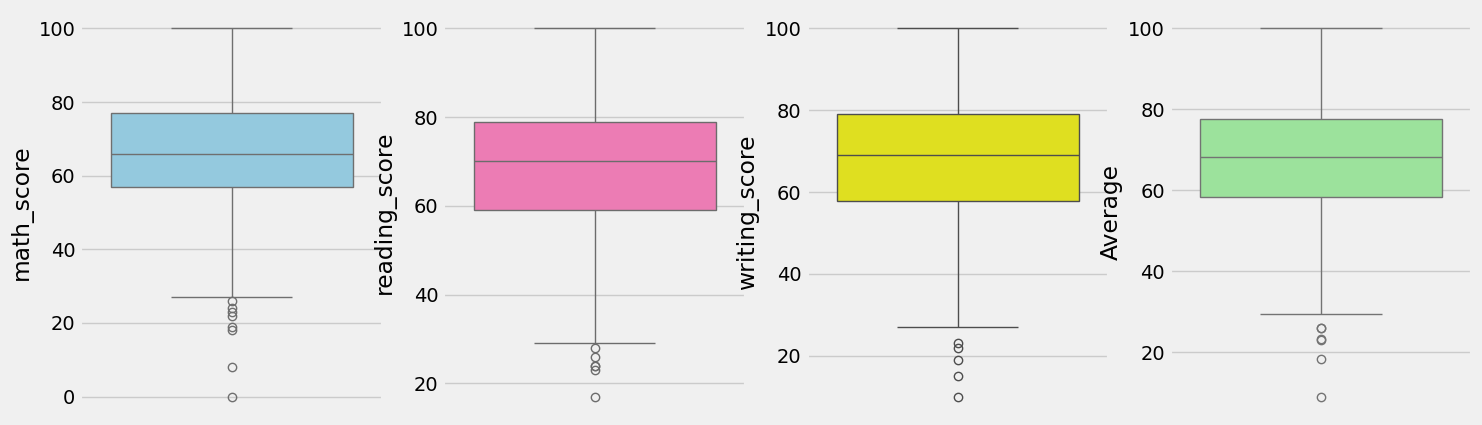

In [109]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

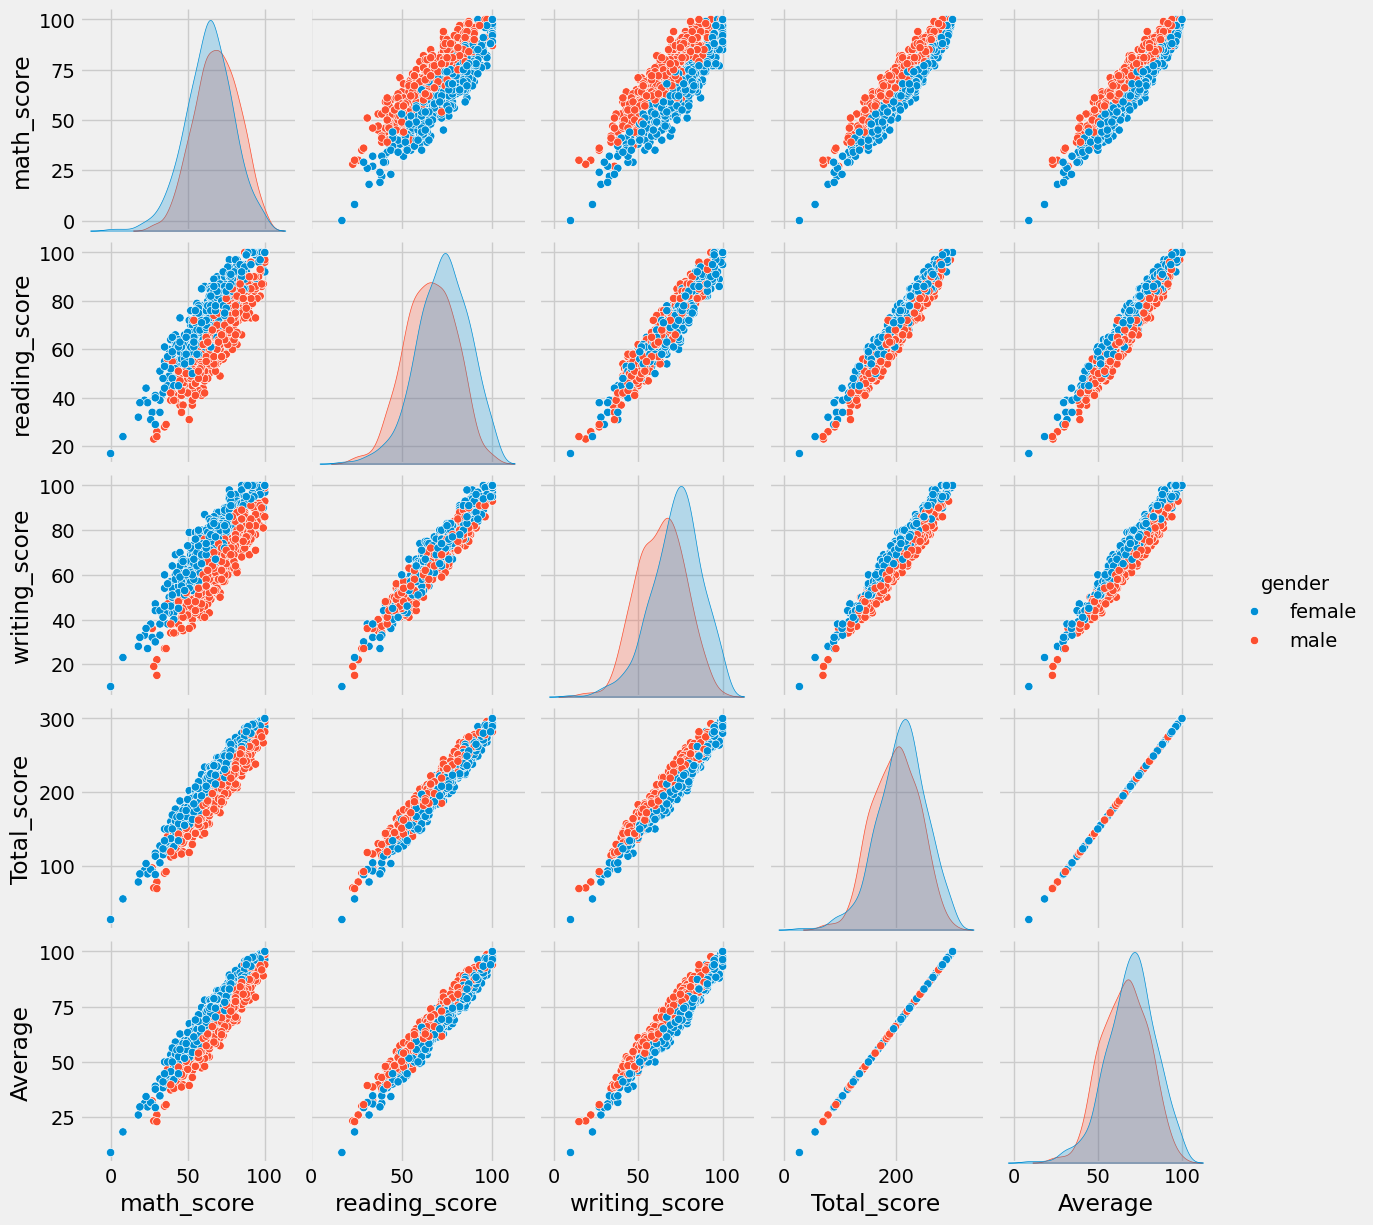

In [113]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions 
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.